# 批标准化
因为模型训练并不容易，特别是一些非常复杂的模型，并不能非常好的训练得到收敛的结果，所以对数据增加一些预处理，同时使用批标准化能够得到非常好的收敛结果。

## 数据预处理
目前数据预处理最常见的方法就是中心化和标准化，中心化相当于修正数据的中心位置，实现方法非常简单，就是在每个特征维度上减去对应的均值，最后得到 0 均值的特征。标准化也非常简单，在数据变成 0 均值之后，为了使得不同的特征维度有着相同的规模，可以除以标准差近似为一个标准正态分布，也可以依据最大值和最小值将其转化为 -1 ~ 1 之间，下面是一个简单的图示

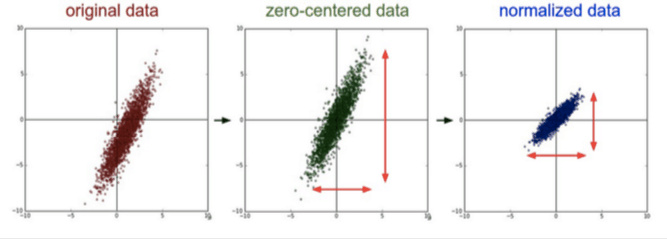

这两种方法非常的常见，如果你还记得，前面我们在神经网络的部分就已经使用了这个方法实现了数据标准化，至于另外一些方法，比如 PCA 或者 白噪声已经用得非常少了。

## Batch Normalization
批标准化，简而言之，就是对于每一层网络的输出，对其做一个归一化，使其服从标准的正态分布，这样后一层网络的输入也是一个标准的正态分布，所以能够比较好的进行训练，加快收敛速度。

batch normalization 的实现非常简单，对于给定的一个 batch 的数据 $B = \{x_1, x_2, \cdots, x_m\}$算法的公式如下

$$
\mu_B = \frac{1}{m} \sum_{i=1}^m x_i
$$
$$
\sigma^2_B = \frac{1}{m} \sum_{i=1}^m (x_i - \mu_B)^2
$$
$$
\hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma^2_B + \epsilon}}
$$
$$
y_i = \gamma \hat{x}_i + \beta
$$

第一行和第二行是计算出一个 batch 中数据的均值和方差，接着使用第三个公式对 batch 中的每个数据点做标准化，$\epsilon$ 是为了计算稳定引入的一个小的常数，通常取 $10^{-5}$，最后利用权重修正得到最后的输出结果。

测试的时候数据量小，所以测试的时候不能用测试的数据集去算均值和方差，而是用训练的时候算出的移动平均均值和方差去代替。